In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

- Moom Dataset

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) 

NOISE = 0.2
EPOCHS = 4000 
ALPHA = 0.1  
N_SAMPLES = 1000

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [4]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [7]:
def predict(row, weight) :
    z = weight[0]
    for i in range(len(row) - 1) :
        z += weight[i + 1] * row[i] 
        # z = w * x + b

    return i if z >= 0 else 0


In [8]:
wgts = np.array([0.1, 2.0, 1.0])
predict(data_train[0], wgts)

1

In [9]:
rng.random(data_train.shape[1])

array([0.33026884, 0.40517732, 0.57473782])

In [10]:
def build_model(train, n_epochs, alpha) :
    error = []
    weight = rng.random(train.shape[1]) # Weight at random
    m = train.shape[0]  # Number of rows in training data
    for epoch in range(n_epochs):
        sum_error = 0.0

        for row in train :
            prediction = predict(row, weight)
            dz = prediction - row[-1]
            sum_error += (dz) ** 2
            weight[0] = weight[0] - alpha * dz / m

            for i in range(len(row) - 1) :
                weight[i + 1] = weight[i + 1] - alpha * dz * row[i] / m

        error.append(sum_error / m)
    return error, weight
 

In [11]:
errors, weights = train_weight(data_train, EPOCHS, ALPHA)
weights

array([-4.46771743e-05,  2.37064990e-04, -4.07450311e-04])

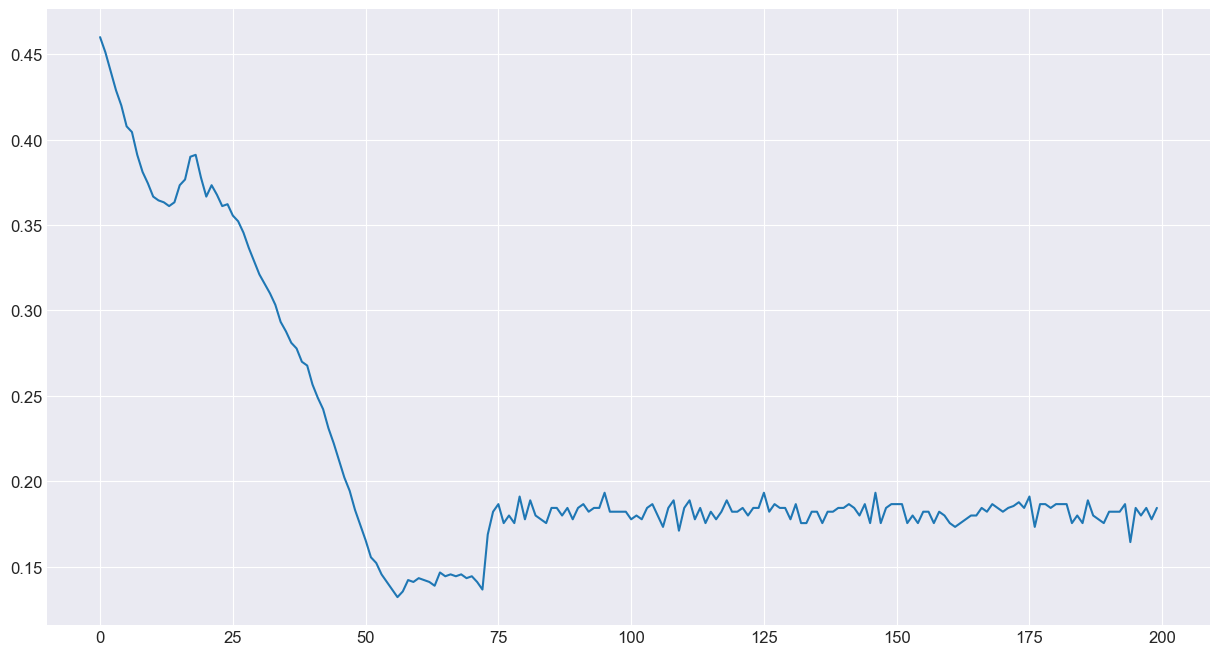

In [12]:
plt.plot(errors)

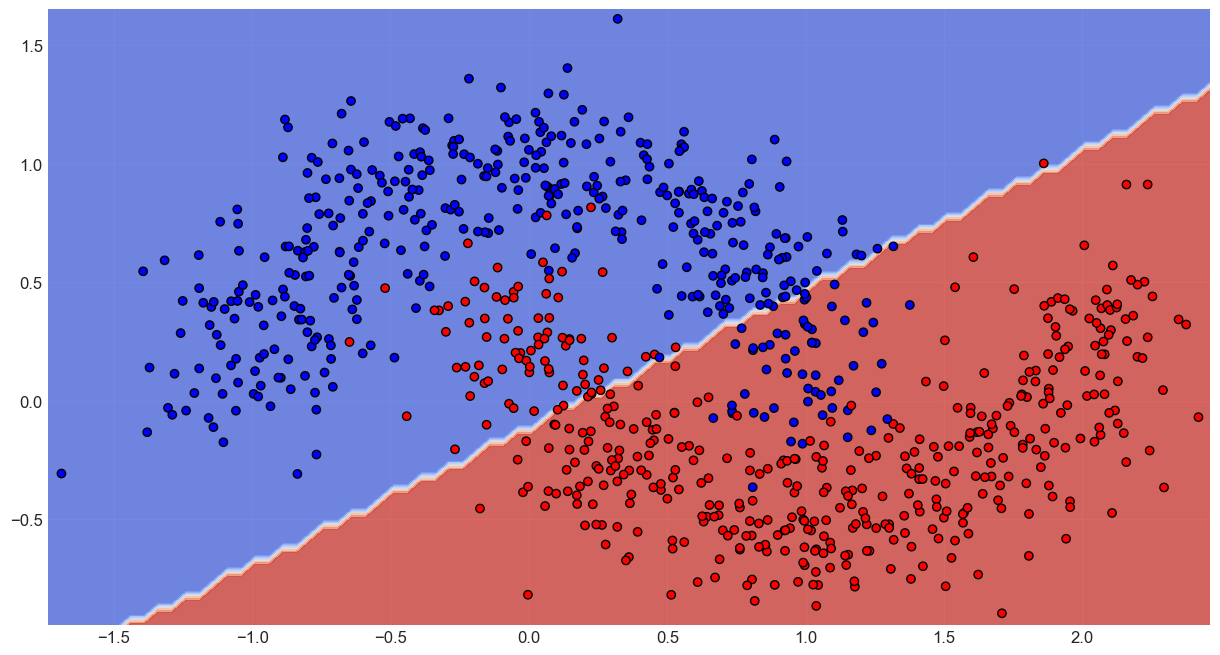

In [13]:
X = data_train

fig, ax = plt.subplots()

dm = 0.05

x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05

xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))

XX = np.c_[xx.ravel(), yy.ravel()]

XX = np.hstack((XX, np.ones((XX.shape[0], 1))))

y_pred = []

for row in XX:
    pred = predict(row, weights)
    y_pred.append(pred)

Z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap = CMAP, alpha = 0.8)
ax.scatter(X[:, 0], X[:, 1], c = X[:, 2], edgecolors='k', cmap=plt.cm.bwr)




## Train Data

In [14]:
prediction = []

for row in data_test :
    pred = predict(row, weights)
    prediction.append(pred)
    
accuracy_score(data_test[:, -1], prediction)

0.89

In [15]:
cm = confusion_matrix(data_test[:, -1], prediction)
cm

array([[54,  4],
       [ 7, 35]], dtype=int64)

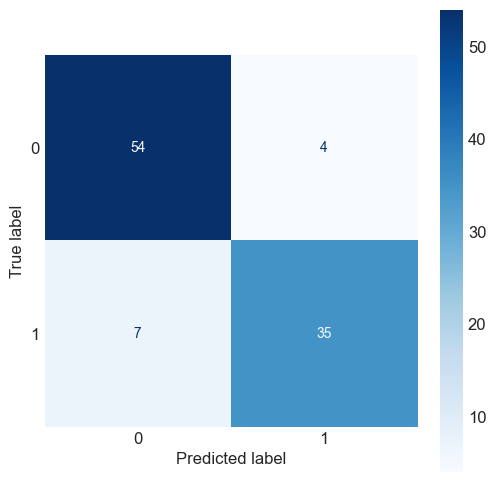

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

fig, ax = plt.subplots(figsize = (6, 6))

disp.plot(ax = ax, cmap='Blues')
ax.grid(False)

In [2]:

import numpy as np
sigmoid = 1 / ( 1 + (np.exp(-Z)))
sigmoid

NameError: name 'Z' is not defined

In [ ]:
assert(a2.shape())